In [6]:
# https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/latest/hand_landmarker.task
import mediapipe as mp
import numpy as np
from mediapipe.framework.formats import landmark_pb2
import cv2

ImportError: DLL load failed while importing _framework_bindings: Een initialisatieroutine van de dynamic link library (DLL-bestand) is mislukt.

In [4]:
BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = 'hand_landmarker.task'

# options for landmarker in image mode:
options = mp.tasks.vision.HandLandmarkerOptions(
    base_options=mp.tasks.BaseOptions(model_asset_path=model_path),
    running_mode=mp.tasks.vision.RunningMode.IMAGE,
    min_hand_detection_confidence = 0.2,
    min_hand_presence_confidence = 0.2,
    min_tracking_confidence = 0.2,
    # num_hands=2
)

def close(landmarker):
  landmarker.close()

NameError: name 'mp' is not defined

In [4]:
# Is this still neccesary with just images?
def get_result(result: mp.tasks.vision.HandLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    return result
    # print(f'hand landmarker result: {result}') 



In [2]:
def draw_landmarks_on_image(rgb_image, detection_result: mp.tasks.vision.HandLandmarkerResult):
    """Courtesy of https://github.com/googlesamples/mediapipe/blob/main/examples/hand_landmarker/python/hand_landmarker.ipynb"""
    global first
    try:
        if detection_result.hand_landmarks == []:
            return rgb_image
        else:
            hand_landmarks_list = detection_result.hand_landmarks
            annotated_image = np.copy(rgb_image)
            
            # Loop through the detected hands to visualize.
            for idx in range(len(hand_landmarks_list)):
                print(hand_landmarks_list[idx])
                hand_landmarks = hand_landmarks_list[idx]
                # Draw the hand landmarks.
                hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
                hand_landmarks_proto.landmark.extend([
                    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks])
                mp.solutions.drawing_utils.draw_landmarks(
                    annotated_image,
                    hand_landmarks_proto,
                    mp.solutions.hands.HAND_CONNECTIONS,
                    mp.solutions.drawing_styles.get_default_hand_landmarks_style(),
                    mp.solutions.drawing_styles.get_default_hand_connections_style())
                
            return annotated_image
    except Exception as e:
        print(e, 'exception')
        return rgb_image

NameError: name 'mp' is not defined

In [13]:
def detect(image, clazz, landmarker):
    return (landmarker.detect(image=image), clazz)

In [ ]:
# load the landmarker
landmarker = mp.tasks.vision.HandLandmarker.create_from_options(options)

# load image
image = mp.Image.create_from_file('./../data/American Sign Language Letters.v1-v1.tensorflow/train/M18_jpg.rf.129826d37d00c7e46376752d8649edaa.jpg')

# detect result to draw detected keypoints on frame
detection_result = detect(image, 'A', landmarker)
image_with_landmarks = draw_landmarks_on_image(image.numpy_view(), detection_result[0])

# show frame with keypoints drawn
cv2.imshow('Image', image_with_landmarks)

# stop!
cv2.waitKey(0)
        
close(landmarker)
cv2.destroyAllWindows()

(HandLandmarkerResult(handedness=[[Category(index=0, score=0.9987502694129944, display_name='Right', category_name='Right')]], hand_landmarks=[[NormalizedLandmark(x=0.4512462019920349, y=0.617003858089447, z=-9.345626494905446e-08, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4895455539226532, y=0.5841653943061829, z=-0.02537473477423191, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.49552541971206665, y=0.5283669233322144, z=-0.0440327487885952, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4417549967765808, y=0.500371515750885, z=-0.06216554343700409, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.392568439245224, y=0.48378100991249084, z=-0.07727140933275223, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4785412847995758, y=0.4663335978984833, z=-0.026575973257422447, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4938638508319855, y=0.4249555766582489, z=-0.06438104063272476, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.511557

In [54]:
def get_keypoints(landmarker, base_path, file_name, clazz):
    image = mp.Image.create_from_file(base_path + file_name)
    return detect(image, clazz, landmarker)

In [104]:
def store_result(result, clazz):
    d = {}
    for k,v in enumerate(result.hand_landmarks[0]):
        d[str(k)+'_x'] = v.x
        d[str(k)+'_y'] = v.y
        d[str(k)+'_z'] = v.z
    # print()
    d['clazz'] = clazz
    # print(d)
    return d
    
    # store result values in dict and add to list

In [94]:
# convert list of dicts to pd.df
def get_data_frame(result_list):
    return pd.DataFrame(result_list)

In [156]:
#!pip install pandas==2.1.4 moet numpy <2 gebruiken voor mediapipe!
import pandas as pd

# create the landmarker
landmarker = mp.tasks.vision.HandLandmarker.create_from_options(options)

train_data = pd.read_csv('./../data/American Sign Language Letters.v1-v1.tensorflow/train/_annotations.csv')
train_data.head()

train_data[:1]
counter = 0
result_list = []

# loop through images in csv and get results
for i in range(len(train_data)):
    values = train_data[i:i+1][['filename','class']].values[0]
    file_name, clazz = values[0], values[1]
    result = get_keypoints(landmarker, './../data/American Sign Language Letters.v1-v1.tensorflow/train/', file_name, clazz)
    if len(result[0].hand_landmarks) > 0:
        result_list.append(store_result(result[0], clazz))


In [166]:
# Load results into DataFrame
df = get_data_frame(result_list)
df.head()

,0_x,0_y,0_z,1_x,1_y,1_z,2_x,2_y,2_z,3_x,...,18_x,18_y,18_z,19_x,19_y,19_z,20_x,20_y,20_z,clazz
0,0.357963,0.891312,5.286707e-07,0.332465,0.841742,-0.207970,0.420522,0.772931,-0.359389,0.519417,...,0.728621,0.824326,-0.485487,0.685875,0.857725,-0.545751,0.626359,0.869419,-0.579146,U
1,0.709939,0.846080,9.368536e-07,0.734930,0.780459,-0.209860,0.657832,0.653019,-0.250424,0.532142,...,0.349967,0.594583,-0.066881,0.369034,0.679679,-0.111207,0.401404,0.734885,-0.117401,K
2,0.341838,0.906321,9.322771e-07,0.247290,0.888483,-0.235631,0.270220,0.842715,-0.377108,0.374304,...,0.688389,0.799496,-0.427929,0.626479,0.814529,-0.500909,0.564967,0.825907,-0.542461,W
3,0.561391,0.661878,6.492910e-07,0.520417,0.702391,-0.052873,0.476159,0.740954,-0.110201,0.437352,...,0.481090,0.599246,-0.227285,0.438356,0.602249,-0.230056,0.420742,0.612311,-0.231886,J
4,0.371029,0.740383,-3.901889e-07,0.465517,0.767053,-0.102019,0.581283,0.711658,-0.152064,0.606322,...,0.301502,0.369815,-0.176874,0.274243,0.454988,-0.170000,0.269511,0.533292,-0.148176,M


<class 'pandas.core.series.Series'>
RangeIndex: 1298 entries, 0 to 1297
Series name: clazz
Non-Null Count  Dtype 
--------------  ----- 
1298 non-null   object
dtypes: object(1)
memory usage: 10.3+ KB
None
['U' 'K' 'W' ... 'A' 'W' 'S']
(1298, 2)
[ 9  2  1 ...  7 20 14]


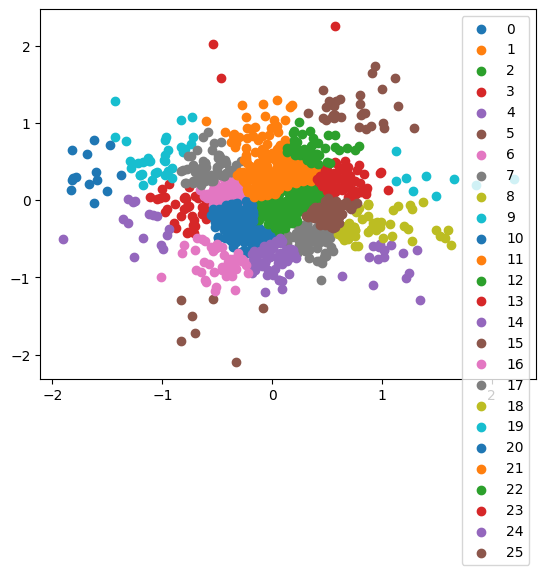

In [158]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# split into data and targets
df_training_x = df[['0_x','0_y','0_z','1_x','1_y','1_z','2_x','2_y','2_z'
                    ,'3_x','3_y','3_z','4_x','4_y','4_z','5_x','5_y','5_z'
                    ,'6_x','6_y','6_z','7_x','7_y','7_z','8_x','8_y','8_z'
                    ,'9_x','9_y','9_z','10_x','10_y','10_z','11_x','11_y','11_z'
                    ,'12_x','12_y','12_z','13_x','13_y','13_z','14_x','14_y','14_z'
                    ,'15_x','15_y','15_z','16_x','16_y','16_z','17_x','17_y','17_z'
                    ,'18_x','18_y','18_z','19_x','19_y','19_z','20_x','20_y','20_z'
]]

df_training_y = df['clazz']

# print information for DataFrame
print(df_training_y.info())
print(df_training_y.values)

# reduce dimensions for plotting and plot 26 clusters
pca = PCA(2)
x = pca.fit_transform(df_training_x.values)
print(x.shape)
kmeans = KMeans(n_clusters=26, random_state=42).fit(x) #for 2 Clusters
print(kmeans.labels_)

#Getting unique labels
unique_labels = np.unique(kmeans.labels_)

# plotting results: 
for i in unique_labels:
    plt.scatter(x[kmeans.labels_ == i , 0] , x[kmeans.labels_ == i , 1] , label = i)
plt.legend()
plt.show()

# TODO: assign letters to labels....


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

logreg = LogisticRegression(max_iter=500, tol=1e-12).fit(df_training_x.values, df_training_y.values)

print('model fit in {} iterations'.format(logreg.n_iter_[0]))
print('accuracy: {:5.4f}'.format(accuracy_score(y_true=df_training_y, y_pred=logreg.predict(X=df_training_x.values))))
print('f1: {:5.4f}'.format(f1_score(average='weighted', y_true=df_training_y, y_pred=logreg.predict(X=df_training_x.values))))
print(classification_report(y_true=df_training_y, y_pred=logreg.predict(X=df_training_x.values)))

print()


for i in range(len(df_training_x)):
    print(df_training_y.iloc[i], logreg.predict([df_training_x.iloc[i]]))


NameError: name 'df_training_x' is not defined

In [ ]:
import session_info
session_info.show()/